# DS602 Midterm

Fake Reviews Dataset.

https://osf.io/3vds7

Goal is to identify the `label`. 

* Use random_state = 120
* Don't use any pretrained ML model/library
* If you need to encode the target variable (label), you may use [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

### Importing the libraries

**The following code imports the required libraries.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# you can import additional libraries

**The following code is used to read the dataset.**

In [2]:
df = pd.read_csv('https://osf.io/download/3vds7/')

**The following code is to view the head of the dataset.**

In [3]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


**Get the info of the dataset.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


**The dataset contains 4 columns, one column is target column (label) and other 3 columns are features.**

**Get the value counts of the label column.**

In [5]:
df.label.value_counts()

CG    20216
OR    20216
Name: label, dtype: int64

**The data is balanced.**

**Get the shape of the dataset.**

In [6]:
df.shape

(40432, 4)

**The dataset contains 40432 rows and 4 columns.**

**Get the value counts of the category column.**

In [7]:
df['category'].value_counts()

Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: category, dtype: int64

**The category column contains 10 different categories with Kindle_Store_5 with highest count and Movies_and_TV_5 with the least count.**

**Get the value counts of the rating column.**

In [8]:
df['rating'].value_counts()

5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: rating, dtype: int64

**The rating column has 5 different values, 5.0 with highest value and 2.0 wit lowest value.**

**View the head of the text_ column to know what kind of data it contains.**

In [9]:
df['text_'].head(5)

0    Love this!  Well made, sturdy, and very comfor...
1    love it, a great upgrade from the original.  I...
2    This pillow saved my back. I love the look and...
3    Missing information on how to use it, but it i...
4    Very nice set. Good quality. We have had the s...
Name: text_, dtype: object

**View the number of missing values in the dataset.**

In [10]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

**From the above code, it is clear that there are no missing values in the dataset.**

### Visualizing the columns

**Visualizing the target column using the countplot.**

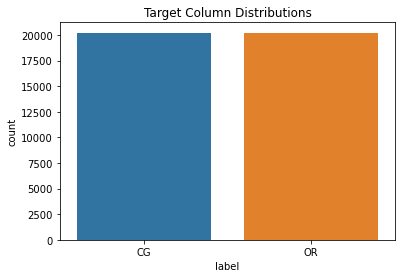

In [11]:
sns.countplot(x='label', data=df)
plt.title('Target Column Distributions')
plt.show()

**The target column is balanced.**

**Visualize the category column using countplot.**

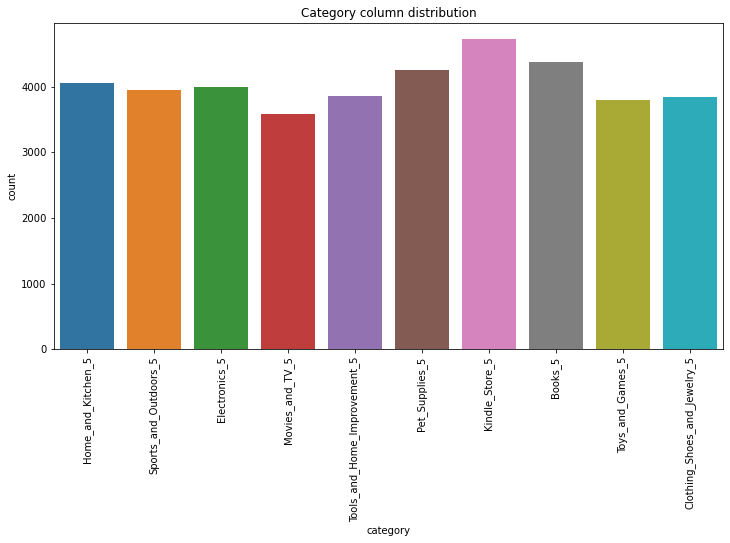

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df)
plt.title('Category column distribution')
plt.xticks(rotation=90) # used for rotating the x-axis for clear visibility of all the column names
plt.show()

**Visualize the rating column.**

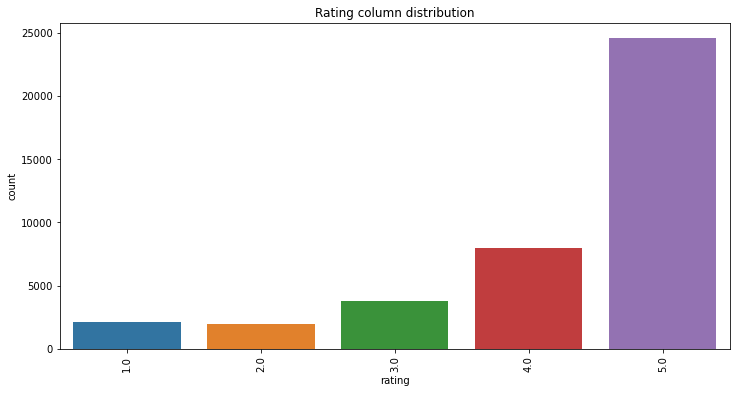

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=df)
plt.title('Rating column distribution')
plt.xticks(rotation=90)
plt.show()

### LabelEncoder

**Do the label encoder for the target variable using LabelEncoder.**

In [14]:
from sklearn.preprocessing import LabelEncoder

a = LabelEncoder() # Initialising the LabelEncoder()

df.label = a.fit_transform(df.label) # Fitting and transforming the label column

df.head() # viewing the head of the dataset after label encoding

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,0,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,0,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,0,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,0,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,0,Very nice set. Good quality. We have had the s...


### Train and test split

**Divide the dataset into X and y. X contains the features except target column. y contains the target column.**

In [15]:
y = df['label'] # Target column is label
X = df[[x for x in df.columns if x != 'label']] # Columns except the target column

In [16]:
X.columns

Index(['category', 'rating', 'text_'], dtype='object')

In [17]:
y

0        0
1        0
2        0
3        0
4        0
        ..
40427    1
40428    0
40429    1
40430    0
40431    1
Name: label, Length: 40432, dtype: int32

**Split the dataset into train and test with a random_state of 120.**

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

In [19]:
print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 32,345
Test samples: 8,087


**The training samples are 32,345 and testing samples are 8087.** 

In [20]:
X_train.shape

(32345, 3)

In [21]:
y_train.shape

(32345,)

**Import the libraries required for feature engineering. These are done in pipeline.**

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


**The steps done in feature engineering are**
- TFIDF Vectorization (term frequency inverse document frequency, measure for information retrieval and quantifying the importance of strings).
- Creating dummies for category column

In [23]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X['text_']

text_vectorizer = Pipeline([
    ('tfidf', TfidfVectorizer())
])

cat_encoder = Pipeline([
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_vectorizer, 'text_'),
        ('categorical', cat_encoder, ['category'])
    ])


**The following code is used to implement LogisticRegression model which implements the pipelines preprocessor and model.**

In [24]:
# Pipeline for implementing preprocessor and LogisticRegression.

from sklearn.linear_model import LogisticRegression

lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(penalty=None))
])

**The following code is for fitting the model to the data.**

In [25]:
lr_model.fit(X_train, y_train)

C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'text_'),
                                                 ('categorical',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['category'])])),
                ('logreg', LogisticRegression(penalty=None))])

### EVALUATION OF TRAINING DATA

**The following code is for predicting the probabilities of training dataset using predict_proba function.**

In [26]:
y_train_predictions = lr_model.predict_proba(X_train)
y_train_predictions[:5]

array([[9.99993629e-01, 6.37107643e-06],
       [5.96445116e-09, 9.99999994e-01],
       [1.28025279e-09, 9.99999999e-01],
       [9.99999970e-01, 2.97445771e-08],
       [9.99782619e-01, 2.17380542e-04]])

**The following code is used to plot the histogram for the training predictions with the legend values Yes and No.**

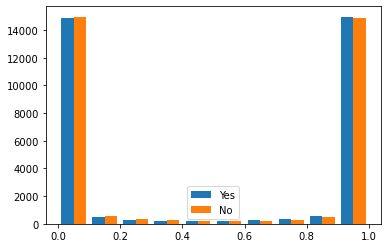

In [27]:
plt.hist(y_train_predictions)
plt.legend(['Yes', 'No'])
plt.show()

**The below code is used to find the confusion matrix of training data and predictions of training data.**

In [28]:
from sklearn.metrics import confusion_matrix

y_train_predictions = lr_model.predict(X_train)

print(confusion_matrix(y_train, y_train_predictions))

[[15893   341]
 [  365 15746]]


**From the above code, it is clear that true positive and true negative values are high which means the model can be a good fit for the data.**

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_train_predictions)

0.9781696869094227

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16234
           1       0.98      0.98      0.98     16111

    accuracy                           0.98     32345
   macro avg       0.98      0.98      0.98     32345
weighted avg       0.98      0.98      0.98     32345



**Logistic Regression model for this training data has an accuracy of 98 percent.**

### EVALUATION FOR TESTING DATA

**The following code is for predicting the probabilities of testing dataset using predict_proba function.**

In [31]:
y_test_predictions = lr_model.predict_proba(X_test)
y_test_predictions[:5]

array([[9.99999587e-01, 4.13031003e-07],
       [9.99959302e-01, 4.06983727e-05],
       [9.54224711e-05, 9.99904578e-01],
       [9.90372047e-01, 9.62795264e-03],
       [7.14977447e-01, 2.85022553e-01]])

**The following code is used to plot the histogram for the testing predictions with the legend values Yes and No.**

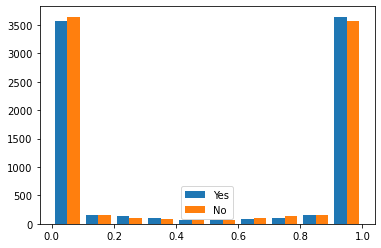

In [32]:
plt.hist(y_test_predictions)
plt.legend(['Yes', 'No'])
plt.show()

**The below code is used to find the confusion matrix of testing data and predictions of testing data.**

In [33]:
from sklearn.metrics import confusion_matrix

y_test_predictions = lr_model.predict(X_test)

print(confusion_matrix(y_test, y_test_predictions))

[[3585  397]
 [ 475 3630]]


**From the above code, it is clear that true positive and true negative values are high which means the model can be a good fit for the testing data also.**

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_predictions)

0.8922944052132281

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predictions))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3982
           1       0.90      0.88      0.89      4105

    accuracy                           0.89      8087
   macro avg       0.89      0.89      0.89      8087
weighted avg       0.89      0.89      0.89      8087



**Logistic Regression model for this testing data has an accuracy of 89 percent.**

In [36]:
from sklearn.metrics import accuracy_score

log_train_accuracy = accuracy_score(y_train,y_train_predictions)

print("Accuracy of logistic regression of training dataset is: ",log_train_accuracy*100)

Accuracy of logistic regression of training dataset is:  97.81728242386768


In [37]:
from sklearn.metrics import accuracy_score

log_test_accuracy = accuracy_score(y_test,y_test_predictions)

print("Accuracy of logistic regression of testing dataset is: ",log_test_accuracy*100)

Accuracy of logistic regression of testing dataset is:  89.21726227278349


**The training data accuarcy is 97.8 and testing data is 89 which means the model is slightly overfitted (good for already known data but not for new data) for the data.** 

# DECISION TREE 

**The following code is used to implement Decision Tree Classifier model which implements the pipelines preprocessor and model.**

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_modeling_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier())  # decision tree classifier
])

**The below code is for fitting the data into decision tree model.**

In [39]:
dt_modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'text_'),
                                                 ('categorical',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['category'])])),
                ('dt', DecisionTreeClassifier())])

**The following code is for predicting the probabilities of training dataset using predict_proba function.**

## EVALUATION OF TRAINING DATA

In [40]:
y_pred = dt_modeling_pipeline.predict_proba(X_train)
y_pred[:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

**The following code is used to plot the histogram for the predictions of the data.**

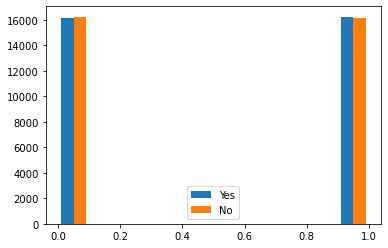

In [41]:
plt.hist(y_pred)
plt.legend(['Yes', 'No'])
plt.show()

**The below code is used to get the confusion matrix of the training data.**

In [42]:
from sklearn.metrics import confusion_matrix

y_train_pred = dt_modeling_pipeline.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))

[[16234     0]
 [    0 16111]]


**The above code output clearly states that there are values only for true positive and true negative which means the model best fits the data.**

In [43]:
from sklearn.metrics import accuracy_score

dt_train_accuracy = accuracy_score(y_train,y_train_pred)

print("Accuracy of decision tree is: ",dt_train_accuracy*100)

Accuracy of decision tree is:  100.0


**From the above code, it is clear that training data accuracy of the model is 100.**

**The below code is used to implement the classification report of the training data.**

In [44]:
report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16234
           1       1.00      1.00      1.00     16111

    accuracy                           1.00     32345
   macro avg       1.00      1.00      1.00     32345
weighted avg       1.00      1.00      1.00     32345



**The below code is used to get the confusion matrix of the testing data.**

## EVALUATION OF TESTING DATA

In [45]:
from sklearn.metrics import confusion_matrix

y_test_pred = dt_modeling_pipeline.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))

[[3132  850]
 [ 986 3119]]


**The above code output clearly states that there are values only for true positive and true negative which means the model might best fits the data.**

In [46]:
from sklearn.metrics import accuracy_score

dt_test_accuracy = accuracy_score(y_test,y_test_pred)

print("Accuracy of decision tree is: ",dt_test_accuracy*100)

Accuracy of decision tree is:  77.29689625324595


**From the above code, it is clear that testing data accuracy of the model is 77.**

In [47]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.79      0.77      3982
           1       0.79      0.76      0.77      4105

    accuracy                           0.77      8087
   macro avg       0.77      0.77      0.77      8087
weighted avg       0.77      0.77      0.77      8087



**Decision Tree model has a training accuracy of 100 and testing accuracy of 77 which means that the model is overfitted for the data and this model cannot be the best fit for the data.**

# RANDOM FOREST

**The following code is used to implement the data preprocessor and random forest classifier model.** 

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_modeling_pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=120))  # Random Forest Classifier
])

**The below code is used to fit the model for the data.**

In [49]:
rf_modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'text_'),
                                                 ('categorical',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['category'])])),
                ('classifier', RandomForestClassifier(random_state=120))])

**The following code is for predicting the probabilities of training dataset using predict_proba function.**

## EVALUATION OF TRAINING DATA

In [50]:
y_pred = rf_modeling_pipeline.predict_proba(X_train)
y_pred[:5]

array([[0.9 , 0.1 ],
       [0.16, 0.84],
       [0.1 , 0.9 ],
       [0.9 , 0.1 ],
       [0.98, 0.02]])

**The following code is used to plot the histogram for the predictions of the data.**

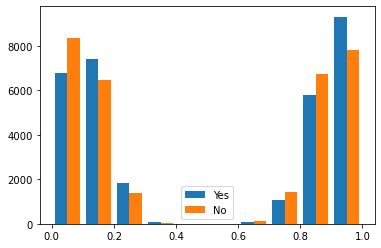

In [51]:
plt.hist(y_pred)
plt.legend(['Yes', 'No'])
plt.show()

**The below code is used to get the confusion matrix of the training data.**

In [52]:
from sklearn.metrics import confusion_matrix

y_train_pred = rf_modeling_pipeline.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))

[[16234     0]
 [    0 16111]]


**The above code output clearly states that there are values only for true positive and true negative which means the model might best fits the data.**

In [53]:
from sklearn.metrics import accuracy_score

rf_train_accuracy = accuracy_score(y_train,y_train_pred)

print("Accuracy of random forest is: ",rf_train_accuracy*100)

Accuracy of random forest is:  100.0


**From the above code, it is clear that training data accuracy of the model is 100.**

In [54]:
report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16234
           1       1.00      1.00      1.00     16111

    accuracy                           1.00     32345
   macro avg       1.00      1.00      1.00     32345
weighted avg       1.00      1.00      1.00     32345



## EVALUATION OF TESTING DATA

**The below code is used to get the confusion matrix of the testing data.**

In [55]:
from sklearn.metrics import confusion_matrix

y_test_pred = rf_modeling_pipeline.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))

[[3678  304]
 [ 590 3515]]


**The above code output clearly states that there are values only for true positive and true negative which means the model might best fits the data.**

In [56]:
from sklearn.metrics import accuracy_score

rf_test_accuracy = accuracy_score(y_test,y_test_pred)

print("Accuracy of random forest is: ",rf_test_accuracy*100)

Accuracy of random forest is:  88.94522072461976


**From the above code, it is clear that testing data accuracy of the model is 88.**

In [57]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3982
           1       0.92      0.86      0.89      4105

    accuracy                           0.89      8087
   macro avg       0.89      0.89      0.89      8087
weighted avg       0.89      0.89      0.89      8087



**Random Forest model has a training accuracy of 100 and testing accuracy of 89 which means that the model is slightly overfitted for the data and this model cannot be the best fit for the data.**

In [58]:
model = rf_modeling_pipeline.named_steps['classifier'] 

# Get feature importances
feature_importances = model.feature_importances_
feature_importances

array([3.37083554e-05, 7.85206864e-06, 0.00000000e+00, ...,
       1.17433961e-03, 1.16088728e-03, 1.25903863e-03])

**The above code is used to get the feature importances of the data.**

# Naive Bayes Classifier

**The following code is used to implement the data preprocessor and naive bayes classifier model.** 

In [59]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', MultinomialNB()) 
])

**The below code is used to fit the model for the data.**

In [60]:
naive_bayes_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'text_'),
                                                 ('categorical',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['category'])])),
                ('classifier', MultinomialNB())])

## EVALUATION OF TRAINING DATA

**The below code is used to get the confusion matrix of the training data.**

In [61]:
from sklearn.metrics import confusion_matrix

y_train_pred = naive_bayes_pipeline.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))

[[15587   647]
 [ 2817 13294]]


**The above code output clearly states that there are values only for true positive and true negative which means the model might best fits the data.**

In [62]:
from sklearn.metrics import accuracy_score

nb_train_accuracy = accuracy_score(y_train,y_train_pred)

print("Accuracy of naive bayes is: ",nb_train_accuracy*100)

Accuracy of naive bayes is:  89.29046220435926


**From the above code, it is clear that training data accuracy of the model is 89.**

In [63]:
report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     16234
           1       0.95      0.83      0.88     16111

    accuracy                           0.89     32345
   macro avg       0.90      0.89      0.89     32345
weighted avg       0.90      0.89      0.89     32345



## EVALUATION OF TESTING DATA

**The below code is used to get the confusion matrix of the testing data.**

In [64]:
from sklearn.metrics import confusion_matrix

y_test_pred = naive_bayes_pipeline.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))

[[3697  285]
 [ 860 3245]]


**The above code output clearly states that there are values only for true positive and true negative which means the model might best fits the data.**

In [65]:
from sklearn.metrics import accuracy_score

nb_test_accuracy = accuracy_score(y_test,y_test_pred)

print("Accuracy of naive bayes is: ",nb_test_accuracy*100)

Accuracy of naive bayes is:  85.84147397057005


**From the above code, it is clear that testing data accuracy of the model is 86.**

In [66]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3982
           1       0.92      0.79      0.85      4105

    accuracy                           0.86      8087
   macro avg       0.87      0.86      0.86      8087
weighted avg       0.87      0.86      0.86      8087



**Naive Bayes Classifier model has a training accuracy of 89 and testing accuracy of 86 which means that the model is just slightly overfitted for the data and this model cannot be the best fit for the data.**

# SVM

**The below code is used to implement the preprocessor and Support Vector Machines model using a pipeline.**

In [67]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', SVC(kernel='linear', decision_function_shape='ovr')) # for parallel processing
])

**The below code is used to fit the pipeline to the training data.**

In [68]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'text_'),
                                                 ('categorical',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['category'])])),
                ('classifier', SVC(kernel='linear'))])

## EVALUATION OF TRAINING DATA

**The below code is used to get the confusion matrix of training data and predictions.**

In [69]:
from sklearn.metrics import confusion_matrix

y_train_pred = svm_pipeline.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))

[[15286   948]
 [  755 15356]]


**From the above code, it is clear that true positive and true negative values are high, which means that the model might be the best fit for the data.**

**The below code is used to get the training data accuracy of the SVM model.**

In [70]:
from sklearn.metrics import accuracy_score

svm_train_accuracy = accuracy_score(y_train,y_train_pred)

print("Accuracy of svm is: ",svm_train_accuracy*100)

Accuracy of svm is:  94.7348894728706


**The training data accuracy of the SVM model is 95.**

In [71]:
report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     16234
           1       0.94      0.95      0.95     16111

    accuracy                           0.95     32345
   macro avg       0.95      0.95      0.95     32345
weighted avg       0.95      0.95      0.95     32345



**The above code is used to get the report of the training data and its predictions.**

In [72]:
from sklearn.metrics import confusion_matrix

y_test_pred = svm_pipeline.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))

[[3620  362]
 [ 341 3764]]


**The above code is used to get the confusion matrix of testing data and predictions.**

In [73]:
from sklearn.metrics import accuracy_score

svm_test_accuracy = accuracy_score(y_test,y_test_pred)

print("Accuracy of svm is: ",svm_test_accuracy*100)

Accuracy of svm is:  91.30703598367751


**From the above code, it is clear that testing data accuracy is 91.**

In [74]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3982
           1       0.91      0.92      0.91      4105

    accuracy                           0.91      8087
   macro avg       0.91      0.91      0.91      8087
weighted avg       0.91      0.91      0.91      8087



**The training data accuracy of SVM model is 95 and testing data accuracy is 91 which means the model is slightly overfitted which means that the model might or might not be the best fit for the data.**

# KNN

**The below code is used to implement the KNN Classifier and data preprocessor.**

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', KNeighborsClassifier(n_neighbors=5)) 
])

**The below code is used to fit the pipeline to the training data.**

In [76]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'text_'),
                                                 ('categorical',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['category'])])),
                ('classifier', KNeighborsClassifier())])

## EVALUATION OF TRAINING DATA

**The below code is used to get the training data accuracy.**

In [77]:
y_train_pred = knn_pipeline.predict(X_train)

In [78]:
from sklearn.metrics import accuracy_score

knn_train_accuracy = accuracy_score(y_train,y_train_pred)

print("Accuracy of knn is: ",knn_train_accuracy*100)

Accuracy of knn is:  65.86180244241768


**The training data accuracy of KNN model is 66.**

In [79]:
report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.99      0.74     16234
           1       0.96      0.33      0.49     16111

    accuracy                           0.66     32345
   macro avg       0.78      0.66      0.62     32345
weighted avg       0.78      0.66      0.62     32345



**The below code is used to get the testing data accuracy.**

In [80]:
y_test_pred = knn_pipeline.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score

knn_test_accuracy = accuracy_score(y_test,y_test_pred)

print("Accuracy of knn is: ",knn_test_accuracy*100)

Accuracy of knn is:  58.37764313095091


**The training data accuracy of KNN model is 58.**

In [82]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.54      0.98      0.70      3982
           1       0.90      0.20      0.33      4105

    accuracy                           0.58      8087
   macro avg       0.72      0.59      0.51      8087
weighted avg       0.72      0.58      0.51      8087



## COMPARISONS OF TRAINING DATA ACCURACY OF ALL THE ABOVE MODELS

In [83]:
# Compare Several models according to their Accuracies
print('Accuracy of all models for the training dataset')

Model_Comparison_train = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Random Forest', 
              'Naive Bayes','Support Vector Machine', 'K-Nearest Neighbor'],
    'Score': [log_train_accuracy, dt_train_accuracy,rf_train_accuracy, nb_train_accuracy, svm_train_accuracy, knn_train_accuracy
              ]})
Model_Comparison_df = Model_Comparison_train.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

Accuracy of all models for the training dataset


,Score,Model
0,1.000000,Decision Tree
1,1.000000,Random Forest
2,0.978173,Logistic Regression
3,0.947349,Support Vector Machine
4,0.892905,Naive Bayes
5,0.658618,K-Nearest Neighbor


## COMPARISONS OF TESTING DATA ACCURACY OF ALL THE ABOVE MODELS

In [84]:
# Compare Several models according to their Accuracies
print('Accuracy of all models for the testing dataset')

Model_Comparison_test = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Random Forest', 
              'Naive Bayes','Support Vector Machine', 'K-Nearest Neighbor'],
    'Score': [log_test_accuracy, dt_test_accuracy, rf_test_accuracy, nb_test_accuracy, svm_test_accuracy, knn_test_accuracy
              ]})
Model_Comparison_df = Model_Comparison_test.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

Accuracy of all models for the testing dataset


,Score,Model
0,0.913070,Support Vector Machine
1,0.892173,Logistic Regression
2,0.889452,Random Forest
3,0.858415,Naive Bayes
4,0.772969,Decision Tree
5,0.583776,K-Nearest Neighbor


### From the above comparisons of accuracies of all the models, 

- it is clear that SVM has less difference between training and testing data, ( that is only 4). So, I can say that SVM model is the best fit for the data.

- To my understanding from the above codes, I can say that SVM is the best fit for the data.

# CROSS VALIDATION

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
log_scores = cross_val_score(lr_model, X_train, y_train, cv=5)
print("Cross-Validation Scores of Logistic Regression:", log_scores)

C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Cross-Validation Scores of Logistic Regression: [0.88591745 0.88607204 0.89117329 0.88143453 0.8845262 ]


**From the above code, it is clear that cross validation of logistic regression is approximately 88 percent. Cross validation is defined as a technique which evaluates the model performance on unseen data.**

- From the above result, I can say that logistic regression might be the best fit for the data.

In [87]:
dt_scores = cross_val_score(dt_modeling_pipeline, X_train, y_train, cv=5)
print("Cross-Validation Scores of Decision Tree:", dt_scores)

Cross-Validation Scores of Decision Tree: [0.77569949 0.76920699 0.77075282 0.76657907 0.76642449]


**From the above code, it is clear that cross validation of decision tree is approximately 77 percent. Cross validation is defined as a technique which evaluates the model performance on unseen data.**

- From the above result, I can say that decision tree might not be the best fit for the data.

In [88]:
rf_scores = cross_val_score(rf_modeling_pipeline, X_train, y_train, cv=5, n_jobs=-1)
print("Cross-Validation Scores of Random Forest:", rf_scores)

Cross-Validation Scores of Random Forest: [0.8771062  0.88143453 0.88622662 0.87586953 0.8863812 ]


**From the above code, it is clear that cross validation of random forest is approximately 88 percent. Cross validation is defined as a technique which evaluates the model performance on unseen data.**

- From the above result, I can say that random forest might be the best fit for the data.

In [89]:
nb_scores = cross_val_score(naive_bayes_pipeline, X_train, y_train, cv=5, n_jobs=-1)
print("Cross-Validation Scores of Naive Bayes:", nb_scores)

Cross-Validation Scores of Naive Bayes: [0.85778327 0.85809244 0.86597619 0.84928119 0.85654661]


**From the above code, it is clear that cross validation of naive bayes is approximately 85 percent. Cross validation is defined as a technique which evaluates the model performance on unseen data.**

- From the above result, I can say that naive bayes might be the best fit for the data.

In [90]:
svm_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=5, n_jobs=-1)
print("Cross-Validation Scores of SVM:", svm_scores)

Cross-Validation Scores of SVM: [0.90400371 0.90353996 0.90941413 0.90570413 0.90446746]


**From the above code, it is clear that cross validation of SVM is approximately 90 percent. Cross validation is defined as a technique which evaluates the model performance on unseen data.**

- From the above result, I can say that SVM might be the best fit for the data.

In [91]:
knn_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=5, n_jobs=-1)
print("Cross-Validation Scores of KNN:", knn_scores)

Cross-Validation Scores of KNN: [0.57937857 0.58324316 0.58818983 0.58494358 0.58447983]


**From the above code, it is clear that cross validation of KNN is approximately 58 percent. Cross validation is defined as a technique which evaluates the model performance on unseen data.**

- From the above result, I can say that KNN might not be the best fit for the data.

**From all the above results, I can say that SVM has the highest cross validation accuracy (90) which means that SVM is the best model fit for this data.**

# HYPERPARAMETER TUNING

# LOGISTIC REGRESSION - HYPERPARAMETER TUNING

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lr_classifier', LogisticRegression())
])

# Initialize the grid parameters of logistic regression
param_grid = {
    'lr_classifier__C': [0.001, 0.01, 0.1, 1, 10],  # Strength of regularization
    'lr_classifier__penalty': ['l1', 'l2'],  # Type of regularization
    'lr_classifier__solver': ['liblinear', 'lbfgs']  # Optimization of solver 
}

# Create a GridSearchCV for cross validation
grid_search_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1) # for parallel processing

# Perform hyperparameter tuning
grid_search_lr.fit(X_train, y_train)

C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solve

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('text',
                                                                         Pipeline(steps=[('tfidf',
                                                                                          TfidfVectorizer())]),
                                                                         'text_'),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('create_dummies_cats',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['category'])])),
                                       ('lr_classifier',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr_classifier__C': [0.001, 0.01, 0.1, 1, 10],
                         'lr_classifier__penalty': ['l1', 'l2'],
                         'lr_classifier__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

## EVALUATION OF TRAINING DATA

In [93]:
y_trainp = grid_search_lr.predict(X_train)

In [94]:
print(confusion_matrix(y_train, y_trainp))

[[15632   602]
 [  513 15598]]


In [95]:
print(classification_report(y_train, y_trainp))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     16234
           1       0.96      0.97      0.97     16111

    accuracy                           0.97     32345
   macro avg       0.97      0.97      0.97     32345
weighted avg       0.97      0.97      0.97     32345



In [96]:
from sklearn.metrics import accuracy_score

lrg_train_accuracy = accuracy_score(y_train,y_trainp)

print("Accuracy of grid search logistic regression is: ",lrg_train_accuracy*100)

Accuracy of grid search logistic regression is:  96.55279023032926


## EVALUATION OF TESTING DATA

In [97]:
y_testp = grid_search_lr.predict(X_test)

In [98]:
print(confusion_matrix(y_test, y_testp))

[[3635  347]
 [ 365 3740]]


In [99]:
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3982
           1       0.92      0.91      0.91      4105

    accuracy                           0.91      8087
   macro avg       0.91      0.91      0.91      8087
weighted avg       0.91      0.91      0.91      8087



In [100]:
from sklearn.metrics import accuracy_score

lrg_test_accuracy = accuracy_score(y_test,y_testp)

print("Accuracy of grid search logistic regression is: ",lrg_test_accuracy*100)

Accuracy of grid search logistic regression is:  91.19574625942872


### Get the best hyperparameters and corresponding accuracy

In [101]:
best_params = grid_search_lr.best_params_
high_accuracy = grid_search_lr.best_score_

print("Best Hyperparameter:", best_params)
print("High Accuracy:", high_accuracy)

Best Hyperparameter: {'lr_classifier__C': 10, 'lr_classifier__penalty': 'l2', 'lr_classifier__solver': 'lbfgs'}
High Accuracy: 0.9041273767197403


# DECISION TREE - HYPERPARAMETER TUNING

In [102]:
dt_modeling_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier())]
)

param_grid = [
  {'dt__max_depth': [2, 5, 10],
   'dt__min_samples_split':[3, 5, 10],
   'dt__min_samples_leaf': [2, 5],
   'dt__class_weight':[None]
  }
 ]

dt_gcv_results = GridSearchCV(estimator=dt_modeling_pipeline, 
                           param_grid=param_grid, scoring='accuracy', refit=True, n_jobs=-1)

dt_gcv_results = dt_gcv_results.fit(X_train, y_train)

## EVALUATION OF TRAINING DATA

In [103]:
y_trainp = dt_gcv_results.predict(X_train)

In [104]:
print(confusion_matrix(y_train, y_trainp))

[[11922  4312]
 [ 1724 14387]]


In [105]:
print(classification_report(y_train, y_trainp))

              precision    recall  f1-score   support

           0       0.87      0.73      0.80     16234
           1       0.77      0.89      0.83     16111

    accuracy                           0.81     32345
   macro avg       0.82      0.81      0.81     32345
weighted avg       0.82      0.81      0.81     32345



In [106]:
from sklearn.metrics import accuracy_score

dtg_train_accuracy = accuracy_score(y_train,y_trainp)

print("Accuracy of grid search decision tree is: ",dtg_train_accuracy*100)

Accuracy of grid search decision tree is:  81.33869222445509


## EVALUATION OF TRAINING DATA

In [107]:
y_testp = dt_gcv_results.predict(X_test)

In [108]:
print(confusion_matrix(y_test, y_testp))

[[2809 1173]
 [ 683 3422]]


In [109]:
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      3982
           1       0.74      0.83      0.79      4105

    accuracy                           0.77      8087
   macro avg       0.77      0.77      0.77      8087
weighted avg       0.77      0.77      0.77      8087



In [110]:
from sklearn.metrics import accuracy_score

dtg_test_accuracy = accuracy_score(y_test,y_testp)

print("Accuracy of grid search decision tree is: ",dtg_test_accuracy*100)

Accuracy of grid search decision tree is:  77.0495857549153


# RANDOM FOREST - HYPERPARAMETER TUNING

In [111]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier())]
)

param_grid = [{'rf__max_depth': [5, 10],
               'rf__n_estimators': [10, 50],
               'rf__class_weight': [None, 'balanced'],
               'rf__max_samples': [1000, 2000]
              }]

rf_results = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, scoring='recall', refit=True, n_jobs=-1)
rf_results = rf_results.fit(X_train, y_train)

## EVALUATION OF TRAINING DATA

In [112]:
rft_yhat = rf_results.predict(X_train)

In [113]:
print(confusion_matrix(y_train, rft_yhat))

[[13530  2704]
 [ 3269 12842]]


In [114]:
print(classification_report(y_train, rft_yhat))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     16234
           1       0.83      0.80      0.81     16111

    accuracy                           0.82     32345
   macro avg       0.82      0.82      0.82     32345
weighted avg       0.82      0.82      0.82     32345



In [115]:
from sklearn.metrics import accuracy_score

rfg_train_accuracy = accuracy_score(y_train,rft_yhat)

print("Accuracy of grid search random forest is: ",rfg_train_accuracy*100)

Accuracy of grid search random forest is:  81.53346730561137


## EVALUATION OF TESTING DATA

In [116]:
rf_yhat = rf_results.predict(X_test)

In [117]:
print(confusion_matrix(y_test, rf_yhat))

[[3352  630]
 [ 885 3220]]


In [118]:
print(classification_report(y_test, rf_yhat))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      3982
           1       0.84      0.78      0.81      4105

    accuracy                           0.81      8087
   macro avg       0.81      0.81      0.81      8087
weighted avg       0.81      0.81      0.81      8087



In [119]:
from sklearn.metrics import accuracy_score

rfg_test_accuracy = accuracy_score(y_test,rf_yhat)

print("Accuracy of grid search random forest is: ",rfg_test_accuracy*100)

Accuracy of grid search random forest is:  81.26622975145294


In [120]:
print(rf_results.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'text_'),
                                                 ('categorical',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['category'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_samples=1000, n_estimators=50))])


# NAIVE BAYES - HYPERPARAMETER TUNING

In [121]:
nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('nb_classifier', MultinomialNB())
])

nb_param_grid = {
    'nb_classifier__alpha': [0.01, 0.1]
}

nb_grid = GridSearchCV(nb_pipeline, param_grid=nb_param_grid, cv=5, n_jobs=-1)
nb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('text',
                                                                         Pipeline(steps=[('tfidf',
                                                                                          TfidfVectorizer())]),
                                                                         'text_'),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('create_dummies_cats',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['category'])])),
                                       ('nb_classifier', MultinomialNB())]),
             n_jobs=-1, param_grid={'nb_classifier__alpha': [0.01, 0.1]})

## EVALUATION OF TRAINING DATA

In [122]:
nbt_yhat = nb_grid.predict(X_train)

In [123]:
print(confusion_matrix(y_train, nbt_yhat))

[[15535   699]
 [ 1947 14164]]


In [124]:
print(classification_report(y_train, nbt_yhat))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     16234
           1       0.95      0.88      0.91     16111

    accuracy                           0.92     32345
   macro avg       0.92      0.92      0.92     32345
weighted avg       0.92      0.92      0.92     32345



In [125]:
from sklearn.metrics import accuracy_score

nbg_train_accuracy = accuracy_score(y_train,nbt_yhat)

print("Accuracy of grid search Naive Bayes is: ",nbg_train_accuracy*100)

Accuracy of grid search Naive Bayes is:  91.81944659143608


## EVALUATION OF TESTING DATA

In [126]:
nb_yhat = nb_grid.predict(X_test)

In [127]:
print(confusion_matrix(y_test, nb_yhat))

[[3578  404]
 [ 641 3464]]


In [128]:
print(classification_report(y_test, nb_yhat))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3982
           1       0.90      0.84      0.87      4105

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



In [129]:
from sklearn.metrics import accuracy_score

nbg_test_accuracy = accuracy_score(y_test,nb_yhat)

print("Accuracy of grid search Naive Bayes is: ",nbg_test_accuracy*100)

Accuracy of grid search Naive Bayes is:  87.07802646222332


In [130]:
print(nb_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'text_'),
                                                 ('categorical',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['category'])])),
                ('nb_classifier', MultinomialNB(alpha=0.1))])


## COMPARISONS OF GRID SEARCH TRAINING ACCURACY OF ALL ALGORITHMS

In [131]:
# Compare Several models according to their Accuracies
print('Accuracy of all models for the training dataset')

Model_Comparison_train_g = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Random Forest', 
              'Naive Bayes'],
    'Score': [lrg_train_accuracy, dtg_train_accuracy,rfg_train_accuracy, nbg_train_accuracy]})

Model_Comparison_df_g = Model_Comparison_train_g.sort_values(by='Score', ascending=False)
Model_Comparison_df_g = Model_Comparison_df_g.set_index('Score')
Model_Comparison_df_g.reset_index()

Accuracy of all models for the training dataset


,Score,Model
0,0.965528,Logistic Regression
1,0.918194,Naive Bayes
2,0.815335,Random Forest
3,0.813387,Decision Tree


## COMPARISONS OF GRID SEARCH TESTING ACCURACY OF ALL ALGORITHMS

In [132]:
# Compare Several models according to their Accuracies
print('Accuracy of all models for the testing dataset')

Model_Comparison_test_g = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Random Forest', 
              'Naive Bayes'],
    'Score': [lrg_test_accuracy, dtg_test_accuracy, rfg_test_accuracy, nbg_test_accuracy]})

Model_Comparison_df_tg = Model_Comparison_test_g.sort_values(by='Score', ascending=False)
Model_Comparison_df_tg = Model_Comparison_df_tg.set_index('Score')
Model_Comparison_df_tg.reset_index()

Accuracy of all models for the testing dataset


,Score,Model
0,0.911957,Logistic Regression
1,0.870780,Naive Bayes
2,0.812662,Random Forest
3,0.770496,Decision Tree


**From the above code, it is clear that**
- Logistic regression has the highest accuracies for both training and testing dataset with a difference of 6 (slightly overfitted). 
- It is also clear that random forest has same accuracy of 81 for both training and testing dataset which means it is neither overfitted or underfitted. 
- I can say that both the logistic regression and random forest can be the best model fits for this data.

# CONCLUSION

## In this project I have done the following :-

**EXPLORATORY DATA ANALYSIS**

- Importing the required libraries.
- Reading the dataset.
- Viewing the head of the dataset.
- View the info of the dataset (category, label and text_ column as categorical and rating column as numerical).
- View the value counts of the target (label) column [the target column is balanced].
- View the shape of the dataset (40432 rows and 4 columns).
- View the category column value counts (consists of 10 different categories).
- View the rating column value counts (values ranging from 1 to 5).
- View the text_ column head to know how the text_ column data looks.
- Check whether there are missing values in the data (there are no missing values).
- Visualize the columns category, rating and label column.
- Do the LabelEncoder of target (label) variable - converting categorical variable to numerical which can be very useful during classification.

**TRAIN AND TEST SPLIT**

- The dataset is divided into train and test split with the random state of 120. After the split, there are 32,345 training samples and 8087 testing samples.

**FEATURE ENGINEERING**

- Create pipelines for TFIDF (TFIDF vectorizer) 
     - TFIDF Vectorization (term frequency inverse document frequency, measure for information retrieval and quantifying the importance of strings) for text_ column.
- Create pipeline for categorical variable encoding using OneHotEncoder to create dummies for category column.

**MODELING**

- Create a pipelines for Logistic Regression, Decision Tree, Random Forest, Naive Bayes, Support Vector Machines, K-Nearest Neighbors.

**MODEL EVALUATION**

- Fit all the above models with the data and evaluate its accuracy, get the classification report, confusion matrix.
- Logistic Regression (Training - 98, Testing - 89 [Overfitted])
- Decision Tree (Training - 100, Testing - 77 [Overfitted])
- Random Forest (Training - 100, Testing - 89 [Overfitted])
- Naive Bayes (Training - 89, Testing - 86 [Slightly Overfitted])
- SVM (Training - 95, Testing - 91 [Slightly Overfitted])
- KNN (Training - 66, Testing - 58 [Overfitted])

**CROSS VALIDATION**

- I have done cross validation with cv = 5 and got the following results
- Logistic Regression (Accuracy - 89)
- Decision Tree (Accuracy - 77)
- Random Forest (Accuracy - 88)
- Naive Bayes (Accuracy - 85)
- SVM (Accuracy - 90)
- KNN (Accuracy - 58)

**HYPERPARAMETER TUNING**

- I have done the hyperparameter tuning using GridSearchCV for the 4 models (Logistic Regression, Decision Tree, Random Forest, Naive Bayes)
- Logistic Regression (Training - 97, Testing - 91 [Overfitted])
- Decision Tree (Training - 81, Testing - 77 [Overfitted])
- Random Forest (Training - 81, Testing - 81 [Overfitted])
- Naive Bayes (Training - 92, Testing - 87 [Slightly Overfitted])

**Considering all the above results, I can say that Logistic Regression, Random Forest and Naive Bayes are the best models for this data taking the parameters like fitting, accuracy, cross validation and hyperparameter tuning.**